# Recuperación de oro de mineral

Preparar un prototipo de modelo de aprendizaje automático para "Figuras". La empresa desarrolla soluciones para el funcionamiento eficiente de las empresas industriales.

El modelo debe predecir la tasa de recuperación de oro del mineral de oro. Utilice datos con parámetros de extracción y refinamiento. 

El modelo ayudará a optimizar la producción para no iniciar una empresa con características deficitarias.

Usted necesita para:

1. Preparar los datos;
2. Realizar análisis de investigación de los datos;
3. Construir y entrenar el modelo.

Para completar el proyecto, póngase en contacto con las bibliotecas *pandas*, *matplotlib* y *sklearn. * Su documentación le ayudará.

## Preparing data

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from collections import defaultdict
from sklearn.dummy import DummyRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import make_scorer, mean_absolute_error
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from scipy.stats import randint
from sklearn.tree import DecisionTreeRegressor 


import warnings
warnings.filterwarnings("ignore") 

### Abrir los archivos y estudiarlos

In [2]:
df_train = pd.read_csv('/datasets/gold_recovery_train_new.csv')
df_test = pd.read_csv('/datasets/gold_recovery_test_new.csv')
df_full = pd.read_csv('/datasets/gold_recovery_full_new.csv')

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


In [4]:
display(df_train.describe())

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,14148.000000,14148.000000,13938.000000,14149.000000,14149.000000,14149.000000,14049.000000,14144.000000,14149.000000,14129.000000,...,14143.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14147.000000,14148.000000
mean,5.142034,10.132960,9.202849,44.003792,66.518832,9.607035,2.597298,10.512122,2.918421,133.320659,...,19.985454,-478.696836,15.487065,-460.229416,16.775136,-483.956022,13.064590,-483.966564,19.577539,-506.798480
std,1.369586,1.654930,2.790516,4.905261,10.295402,2.319069,0.971843,3.003617,0.903712,39.431659,...,5.657723,50.736021,5.255655,58.843586,5.831906,37.892788,5.765617,39.207913,5.764417,37.079249
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003112,...,0.000000,-799.709069,0.000000,-799.889113,-0.372054,-797.142475,0.646208,-800.006180,0.195324,-809.398668
25%,4.211620,9.297355,7.484645,43.276111,62.545817,7.997429,1.905973,8.811324,2.368607,107.006651,...,14.990775,-500.628656,11.894558,-500.149000,11.083980,-500.363177,8.994405,-500.105994,14.989304,-500.745104
50%,4.994652,10.297144,8.845462,44.872436,67.432775,9.480270,2.592022,10.514621,2.851025,133.018328,...,20.001789,-499.681450,14.975536,-499.388738,17.932223,-499.702452,11.997547,-499.914556,19.984175,-500.061431
75%,5.859540,11.170603,10.487508,46.166425,72.346428,11.003707,3.241723,11.933009,3.434764,159.825396,...,24.990826,-477.472413,20.059375,-400.039008,21.346550,-487.712108,17.982903,-453.186936,24.991623,-499.536466
max,16.001945,17.031899,18.124851,52.756638,100.000000,19.552149,5.639565,22.317730,8.197408,250.127834,...,30.115735,-245.239184,24.007913,-145.071088,43.709931,-275.073125,27.926001,-157.396071,32.188906,-104.427459


In [5]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

In [6]:
display(df_test.describe())

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,5286.000000,5285.000000,5290.000000,5286.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,...,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000
mean,174.839652,8.683596,7.266339,1.383803,1.539494e+03,-497.665883,1.545174e+03,-500.273098,1.527272e+03,-498.330680,...,1.632007e+01,-505.144570,1.373544e+01,-463.349858,12.804186,-501.329122,9.881145,-495.663398,17.304935,-501.793193
std,43.027080,3.072050,0.610219,0.643474,1.167979e+02,19.952431,1.222246e+02,32.968307,1.225380e+02,21.964876,...,3.493583e+00,31.427337,3.430484e+00,86.189107,3.026591,17.951495,2.868205,34.535007,4.536544,39.044215
min,2.566156,0.003839,5.650000,0.004984,5.445860e-32,-795.316337,6.647490e-32,-799.997015,4.033736e-32,-799.960571,...,1.079872e-16,-799.798523,2.489718e-17,-800.836914,0.069227,-797.323986,0.528083,-800.220337,-0.079426,-809.741464
25%,147.121401,6.489555,6.890000,0.907623,1.498936e+03,-500.357298,1.498971e+03,-500.703002,1.473230e+03,-501.018117,...,1.403618e+01,-500.868258,1.202862e+01,-500.323028,10.914838,-500.726841,8.036719,-500.194668,13.997317,-500.690984
50%,177.828489,8.052207,7.250000,1.197610,1.585129e+03,-499.969164,1.595622e+03,-500.028514,1.549595e+03,-500.017711,...,1.700847e+01,-500.115727,1.496486e+01,-499.576513,12.954182,-499.990332,10.004301,-499.990535,16.014935,-500.007126
75%,208.125438,10.027764,7.600000,1.797819,1.602077e+03,-499.568951,1.602324e+03,-499.293257,1.601144e+03,-498.994130,...,1.803862e+01,-499.404224,1.596213e+01,-400.933805,15.097528,-499.283191,11.997467,-499.719913,21.020013,-499.373018
max,265.983123,40.000000,15.500000,4.102454,2.103104e+03,-57.195404,1.813084e+03,-142.527229,1.715054e+03,-150.937035,...,3.005180e+01,-401.565212,3.126971e+01,-6.506986,25.258848,-244.483566,14.086866,-137.740004,26.705889,-123.307487


In [7]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64


In [8]:
display(df_full.describe())

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,19438.000000,19438.000000,19228.000000,19439.000000,19439.000000,19438.000000,19338.000000,19433.000000,19439.000000,19415.000000,...,19433.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19437.000000,19438.000000
mean,5.168470,9.978895,9.501224,44.076513,67.050208,9.688589,2.705795,10.583728,3.042467,144.624774,...,18.987674,-485.894516,15.010366,-461.078636,15.694452,-488.684065,12.198224,-487.149827,18.959024,-505.436305
std,1.372348,1.669240,2.787537,5.129784,10.125840,2.328642,0.949077,2.868782,0.922808,44.464071,...,5.411058,47.758570,4.890228,67.405524,5.510974,34.533396,5.333024,38.347312,5.550498,37.689057
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003112,...,0.000000,-799.798523,0.000000,-800.836914,-0.372054,-797.323986,0.528083,-800.220337,-0.079426,-809.741464
25%,4.251240,9.137262,7.722820,43.402215,63.299712,8.062878,2.040119,8.938947,2.461138,114.107029,...,14.975734,-500.704892,11.940294,-500.187742,10.988606,-500.458467,8.971105,-500.129462,14.983037,-500.728067
50%,5.066094,10.102433,9.218961,45.011244,68.172738,9.743623,2.748730,10.622456,2.984909,143.232103,...,18.017481,-499.837793,14.971014,-499.459786,15.000036,-499.802605,11.019433,-499.935317,19.960541,-500.048400
75%,5.895527,11.035769,10.947813,46.275313,72.686642,11.134294,3.333216,12.104271,3.571351,175.075656,...,23.012470,-498.249730,19.034162,-400.118106,18.026190,-498.384187,14.019088,-499.436708,24.003170,-499.495378
max,16.001945,17.031899,19.615720,52.756638,100.000000,19.552149,5.804178,22.317730,8.245022,265.983123,...,30.115735,-245.239184,31.269706,-6.506986,43.709931,-244.483566,27.926001,-137.740004,32.188906,-104.427459


In [9]:
df_test.duplicated().sum()

0

In [10]:
df_train.duplicated().sum()

0

In [11]:
df_full.duplicated().sum()

0

In [12]:
df_test.shape

(5290, 53)

In [13]:
df_train.shape

(14149, 87)

In [14]:
df_full.shape

(19439, 87)

Vemos que el número de líneas de prueba + muestras de entrenamiento coincide con el número completo. En la muestra de prueba 34 columnas menos.

### Compruebe que la eficiencia de enriquecimiento se calcula correctamente.

Calcule en una muestra de aprendizaje para la función rougher.output.recovery. Encuentre el MAE entre sus cálculos y el valor de la función.

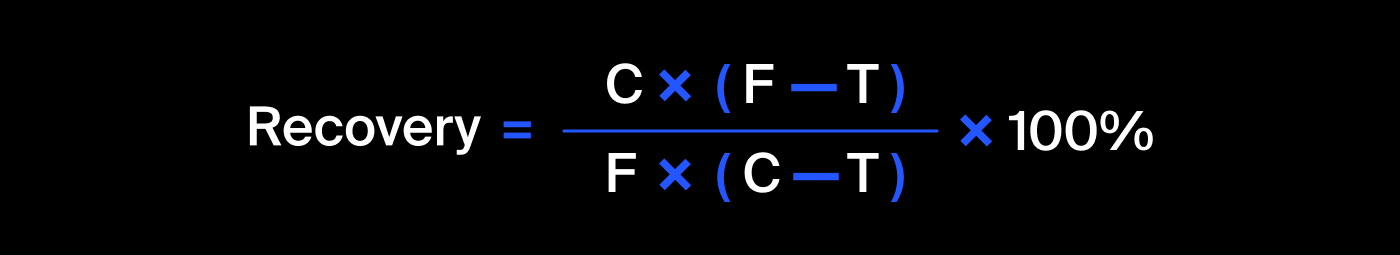

In [15]:
C = df_train['rougher.output.concentrate_au']
F = df_train['rougher.input.feed_au']
T = df_train['rougher.output.tail_au']

In [16]:
df_train['recovery_calc'] = ((C * (F - T))/(F * (C - T))) * 100 # add result to new column
df_train['recovery_calc'].mean()

82.70450164550293

In [17]:
df_train['rougher.output.recovery'].mean() #compare with the feature value rougher.output.recovery

82.70450164550293

La eficiencia se calcula correctamente. Porque los valores coinciden.  

Encuentre MAE (error absoluto promedio):

In [18]:
print(mean_absolute_error(df_train['recovery_calc'], df_train['rougher.output.recovery']))

9.73512347450521e-15


El valor de MAE es muy pequeño, lo que confirma la exactitud del cálculo.

#### Analizar características no disponibles en la muestra de prueba. 
¿Cuáles son estos parámetros? ¿Qué tipo son?

In [19]:
lost = set(df_train.columns) - set(df_test.columns)
lost

{'final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'recovery_calc',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 

En la muestra de prueba no hay atributos de salida - parámetros del producto, atributos de destino, cálculo - características de cálculo para la etapa más áspera - es posible que estos atributos se calculan más tarde y no están disponibles durante el proceso.

Necesitamos agregar dos temas objetivo a la muestra de prueba, tomándolos de los índices de fecha completa.

In [20]:
df_full['date'] = pd.to_datetime(df_full['date'], format="%Y-%m-%d %H:%M:%S")
df_train['date'] = pd.to_datetime(df_train['date'], format="%Y-%m-%d %H:%M:%S")
df_test['date'] = pd.to_datetime(df_test['date'], format="%Y-%m-%d %H:%M:%S")

df_full.set_index('date', inplace=True)
df_test.set_index('date', inplace=True)
df_train.set_index('date', inplace=True)

In [21]:
df_test['rougher.output.recovery'] = df_full['rougher.output.recovery']
df_test['final.output.recovery'] = df_full['final.output.recovery']

### Haz una prueba previa de los datos.

Vamos a encontrar algunos pases:

In [22]:
df_test.isna().sum()

primary_cleaner.input.sulfate                  4
primary_cleaner.input.depressant               5
primary_cleaner.input.feed_size                0
primary_cleaner.input.xanthate                 4
primary_cleaner.state.floatbank8_a_air         0
primary_cleaner.state.floatbank8_a_level       0
primary_cleaner.state.floatbank8_b_air         0
primary_cleaner.state.floatbank8_b_level       0
primary_cleaner.state.floatbank8_c_air         0
primary_cleaner.state.floatbank8_c_level       0
primary_cleaner.state.floatbank8_d_air         0
primary_cleaner.state.floatbank8_d_level       0
rougher.input.feed_ag                          0
rougher.input.feed_pb                          0
rougher.input.feed_rate                        3
rougher.input.feed_size                        1
rougher.input.feed_sol                        21
rougher.input.feed_au                          0
rougher.input.floatbank10_sulfate              5
rougher.input.floatbank10_xanthate             0
rougher.input.floatb

In [23]:
df_train.isna().sum()

final.output.concentrate_ag                     1
final.output.concentrate_pb                     1
final.output.concentrate_sol                  211
final.output.concentrate_au                     0
final.output.recovery                           0
                                             ... 
secondary_cleaner.state.floatbank5_b_air        1
secondary_cleaner.state.floatbank5_b_level      1
secondary_cleaner.state.floatbank6_a_air        2
secondary_cleaner.state.floatbank6_a_level      1
recovery_calc                                   0
Length: 87, dtype: int64

In [24]:
df_full.isna().sum()

final.output.concentrate_ag                     1
final.output.concentrate_pb                     1
final.output.concentrate_sol                  211
final.output.concentrate_au                     0
final.output.recovery                           0
                                             ... 
secondary_cleaner.state.floatbank5_a_level      1
secondary_cleaner.state.floatbank5_b_air        1
secondary_cleaner.state.floatbank5_b_level      1
secondary_cleaner.state.floatbank6_a_air        2
secondary_cleaner.state.floatbank6_a_level      1
Length: 86, dtype: int64

Los datos se indexan por la fecha y hora en que se recibe la información (función de fecha). Los parámetros adyacentes a la hora suelen ser similares. Así que podemos llenar los espacios en blanco con los valores anteriores.

In [25]:
df_test.ffill(axis='rows', inplace=True)
df_train.ffill(axis='rows', inplace=True)
df_full.ffill(axis='rows', inplace=True)

In [26]:
# Compruebe la corrección en una de las muestras:
df_train.isna().sum()

final.output.concentrate_ag                   0
final.output.concentrate_pb                   0
final.output.concentrate_sol                  0
final.output.concentrate_au                   0
final.output.recovery                         0
                                             ..
secondary_cleaner.state.floatbank5_b_air      0
secondary_cleaner.state.floatbank5_b_level    0
secondary_cleaner.state.floatbank6_a_air      0
secondary_cleaner.state.floatbank6_a_level    0
recovery_calc                                 0
Length: 87, dtype: int64

Datos listos para análisis.

## Análisis de datos

Vea cómo cambia la concentración de metal (Au, Ag, Pb) en diferentes pasos de limpieza.

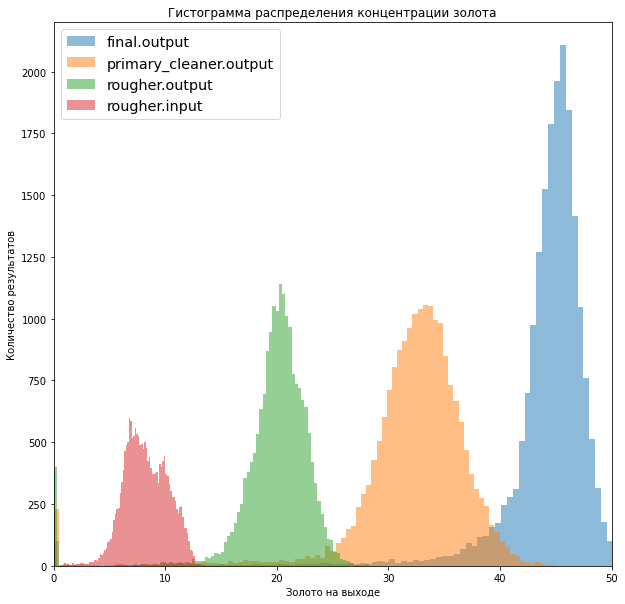

In [27]:
    # Au - oro

plt.figure(figsize=[10,10])

plt.hist(df_full['final.output.concentrate_au'], bins=100, label = 'final.output', alpha=.5)
plt.hist(df_full['primary_cleaner.output.concentrate_au'], bins=100, label = 'primary_cleaner.output', alpha=.5)
plt.hist(df_full['rougher.output.concentrate_au'], bins=100, label = 'rougher.output', alpha=.5)
plt.hist(df_full['rougher.input.feed_au'], bins=100, label = 'rougher.input', alpha=.5)

plt.xlim([0, 50])
plt.ylim([0, 2200])

plt.xlabel("Золото на выходе")
plt.ylabel("Количество результатов")

plt.legend(loc='upper left', fontsize='x-large')

plt.title("Гистограмма распределения концентрации золота")
plt.show()

La concentración de oro aumenta con cada nivel de filtración.

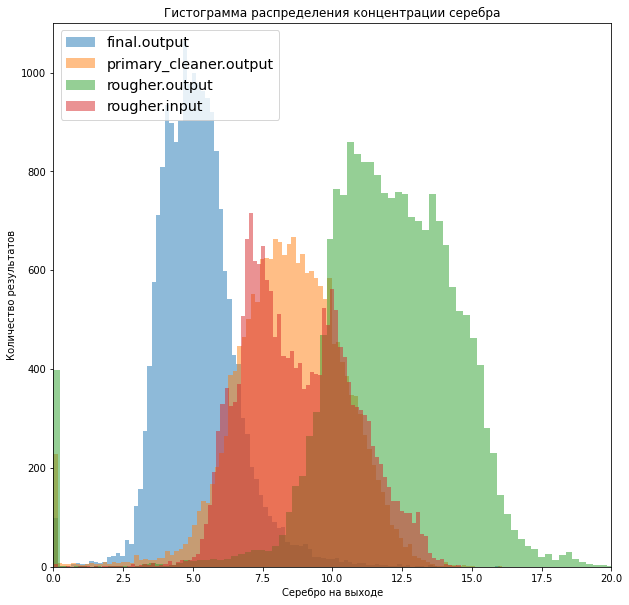

In [28]:
    # Ag - plata

plt.figure(figsize=[10,10])

plt.hist(df_full['final.output.concentrate_ag'], bins=100, label = 'final.output', alpha=.5)
plt.hist(df_full['primary_cleaner.output.concentrate_ag'], bins=100, label = 'primary_cleaner.output', alpha=.5)
plt.hist(df_full['rougher.output.concentrate_ag'], bins=100, label = 'rougher.output', alpha=.5)
plt.hist(df_full['rougher.input.feed_ag'], bins=100, label = 'rougher.input', alpha=.5)

plt.xlim([0, 20])
plt.ylim([0, 1100])

plt.xlabel("Серебро на выходе")
plt.ylabel("Количество результатов")

plt.legend(loc='upper left', fontsize='x-large')

plt.title("Гистограмма распределения концентрации серебра")
plt.show()

La concentración de plata disminuye.

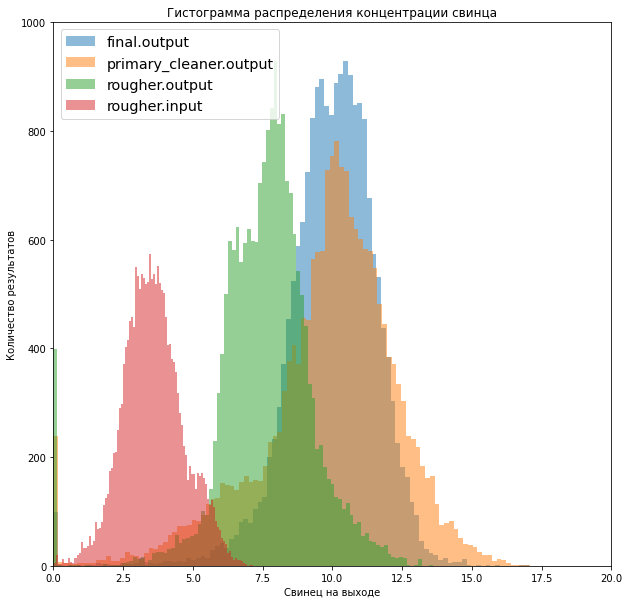

In [29]:
    # Pb - plomo

plt.figure(figsize=[10,10])

plt.hist(df_full['final.output.concentrate_pb'], bins=100, label = 'final.output', alpha=.5)
plt.hist(df_full['primary_cleaner.output.concentrate_pb'], bins=100, label = 'primary_cleaner.output', alpha=.5)
plt.hist(df_full['rougher.output.concentrate_pb'], bins=100, label = 'rougher.output', alpha=.5)
plt.hist(df_full['rougher.input.feed_pb'], bins=100, label = 'rougher.input', alpha=.5)

plt.xlim([0, 20])
plt.ylim([0, 1000])

plt.xlabel("Свинец на выходе")
plt.ylabel("Количество результатов")

plt.legend(loc='upper left', fontsize='x-large')

plt.title("Гистограмма распределения концентрации свинца")
plt.show()

El histograma muestra que la concentración de plomo en el proceso también está aumentando, aunque no tanto como en el oro.

También vemos un gran número de valores cero en las tres etapas.

### Compare la distribución de tamaños de grano de materias primas en muestras de entrenamiento y prueba.
Si las distribuciones son muy diferentes entre sí, la evaluación del modelo será incorrecta.

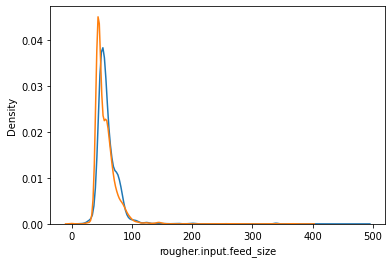

In [30]:
sns.kdeplot(data= df_train['rougher.input.feed_size'].dropna(), label='data_train');
sns.kdeplot(data= df_test['rougher.input.feed_size'].dropna(), label='data_train');

No hay diferencia visual entre las muestras de entrenamiento y de prueba.

### Explore la concentración total de todas las sustancias en diferentes etapas: en materias primas, en concentrados negros y finales

In [31]:
df_train.loc[:, 'Сум. концентрация всех веществ в сырье'] = df_train.loc[:, ['rougher.input.feed_au',
                                'rougher.input.feed_ag',
                                'rougher.input.feed_pb',
                                'rougher.input.feed_sol']].sum(axis=1)
df_train.loc[:, 'Сум. концентрация всех веществ в черновом концентрате'] = df_train.loc[:, ['rougher.output.concentrate_au',
                                'rougher.output.concentrate_ag',
                                'rougher.output.concentrate_pb',
                                'rougher.output.concentrate_sol']].sum(axis=1)
df_train.loc[:, 'Сум. концентрация всех веществ финального концентрата'] = df_train.loc[:, ['final.output.concentrate_au',
                               'final.output.concentrate_ag',
                               'final.output.concentrate_pb',
                               'final.output.concentrate_sol']].sum(axis=1)

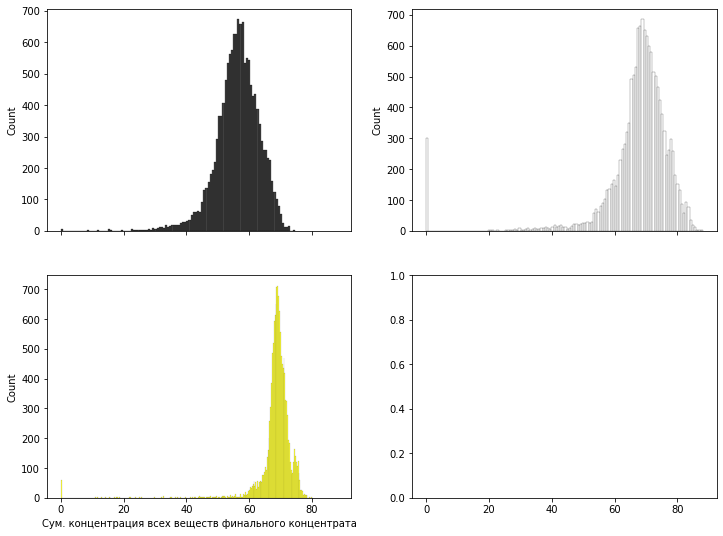

In [32]:
f, axes = plt.subplots(2, 2, figsize=(12, 9), sharex=True)
sns.histplot(df_train['Сум. концентрация всех веществ в сырье'], color="black", ax=axes[0, 0])
sns.histplot(df_train['Сум. концентрация всех веществ в черновом концентрате'], color="white", ax=axes[0, 1])
sns.histplot(df_train['Сум. концентрация всех веществ финального концентрата'], color="yellow", ax=axes[1, 0]);

Los gráficos muestran anomalías que necesitan ser eliminadas.

In [33]:
df_train = df_train[(df_train['Сум. концентрация всех веществ в сырье'] > 10) &
 (df_train['Сум. концентрация всех веществ в черновом концентрате'] > 20) &
 (df_train['Сум. концентрация всех веществ финального концентрата'] > 10)]

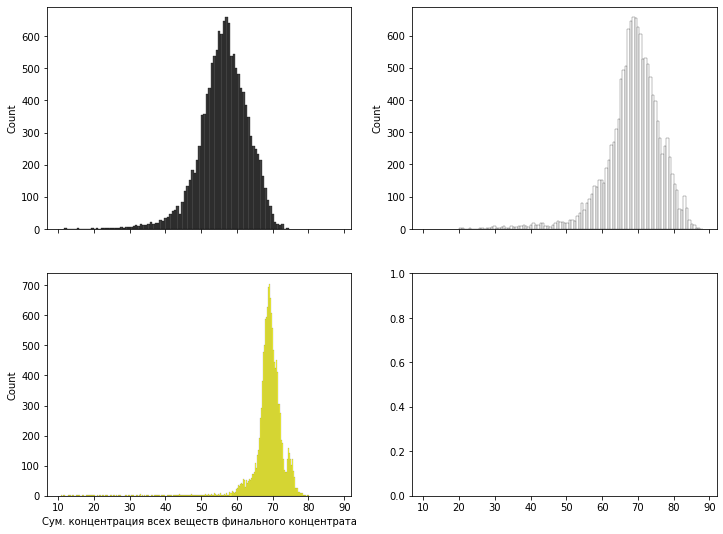

In [34]:
# Проверка

f, axes = plt.subplots(2, 2, figsize=(12, 9), sharex=True)
sns.histplot(df_train['Сум. концентрация всех веществ в сырье'], color="black", ax=axes[0, 0])
sns.histplot(df_train['Сум. концентрация всех веществ в черновом концентрате'], color="white", ax=axes[0, 1])
sns.histplot(df_train['Сум. концентрация всех веществ финального концентрата'], color="yellow", ax=axes[1, 0]);

Mostramos la concentración de metales (Au, Ag, Pb) en diferentes etapas de tratamiento, el tamaño de los gránulos de las materias primas y la concentración total de todas las sustancias en diferentes etapas: en materias primas, en negro y concentrados finales.
Se encontraron y eliminaron anomalías. Datos listos para aprender.

## Model

Al construir modelos solo podemos tener en cuenta aquellas columnas que están en las columnas de prueba y destino, el resto en la muestra de entrenamiento no debe tomarse (recomendación del entrenador).

In [35]:
lost.remove('rougher.output.recovery')
lost.remove('final.output.recovery')
df_train = df_train.drop(lost, axis=1)

In [36]:
df_train.shape

(13778, 57)

También retire las columnas auxiliares con concentración total.

In [37]:
df_train.drop('Сум. концентрация всех веществ в сырье', axis=1, inplace=True)
df_train.drop('Сум. концентрация всех веществ в черновом концентрате', axis=1, inplace=True)
df_train.drop('Сум. концентрация всех веществ финального концентрата', axis=1, inplace=True)

### Escriba una función para calcular el sMAPE resultante.

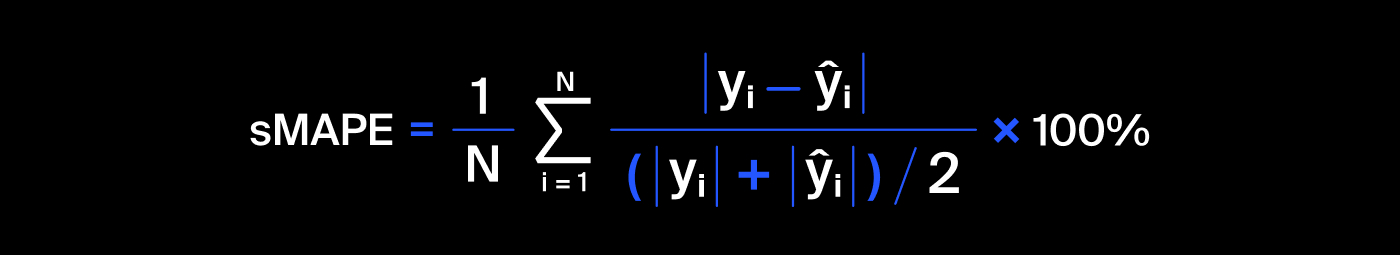
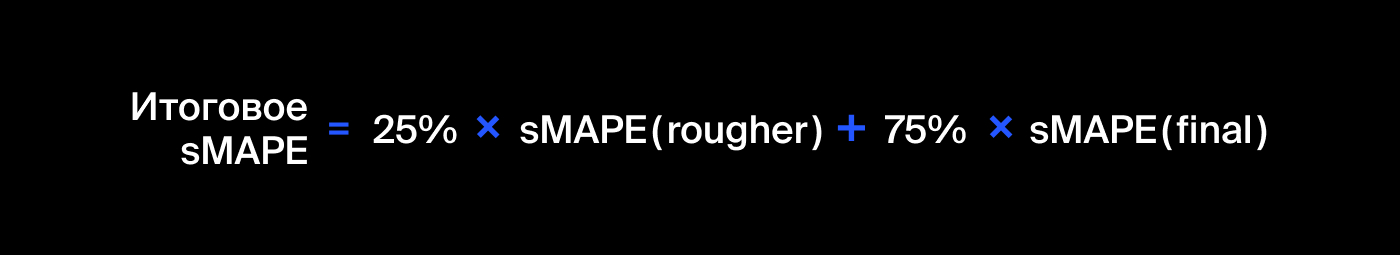

In [38]:
def sMAPE(y_true, y_pred):
    error = np.mean(abs(y_true - y_pred)/((abs(y_true) + abs(y_pred))/2)) * 100
    return error

In [39]:
def final_sMAPE(sMAPE_rougher, sMAPE_final):
    return (0.25 * sMAPE_rougher + 0.75 * sMAPE_final)

### Elaboración de diferentes modelos y evaluación de su cotejo de calidad. 
Seleccione el mejor modelo y pruébelo en una muestra de prueba. Describa las conclusiones.

In [40]:
#Create a function to set hyperparameters:

def hyppar(model, target, features):
    my_scorer = make_scorer(sMAPE)
    
    scores = cross_val_score(model,
                             features,
                             target,
                             cv=5,
                             scoring=my_scorer)
    
    return scores.mean()

In [41]:
#Haremos funciones para la conversión de características de muestra de prueba:

def feature_target_rougher(data):
    data_cols = pd.Series(data.columns)
    features_1_col = list(data_cols[data_cols.str.contains('rougher.input|rougher.state')])
    features_1 = data[features_1_col]
    
    scaler_1 = StandardScaler()
    features_1 = scaler_1.fit_transform(features_1)
    target_1 = data['rougher.output.recovery']
    
    return features_1, target_1, scaler_1

In [42]:
def feature_target_final(data):
    features_2 = data.drop(['final.output.recovery', 'rougher.output.recovery'], axis=1)
    
    scaler_2 = StandardScaler()
    features_2 = scaler_2.fit_transform(features_2)
    target_2 = data['final.output.recovery']
    
    return features_2, target_2, scaler_2

In [43]:
features_1, target_1, scaler_1 = feature_target_rougher(df_train)
features_2, target_2, scaler_2 = feature_target_final(df_train)

#### DecisionTree

In [44]:
d = defaultdict(list)
for depth in range(2, 14):
    
        model_1 = DecisionTreeRegressor(max_depth=depth, random_state=12345)
        model_2 = DecisionTreeRegressor(max_depth=depth, random_state=12345)

        rougher_smape = hyppar(model_1, target_1, features_1)
        final_smape = hyppar(model_2, target_2, features_2)
        d['rougher_smape'].append(rougher_smape)
        d['final_smape'].append(final_smape)
        d['end_smape'].append(final_sMAPE(rougher_smape, final_smape))
        d['depth'].append(depth)

pd.DataFrame(d).sort_values(by='end_smape')

,rougher_smape,final_smape,end_smape,depth
1,7.031491,9.441246,8.838807,3
0,7.353549,9.365687,8.862652,2
2,6.816533,9.792827,9.048754,4
3,7.055637,10.652873,9.753564,5
4,7.213011,10.630848,9.776389,6
5,7.798659,11.461416,10.545727,7
6,8.228922,13.041094,11.838051,8
7,8.310750,13.076037,11.884715,9
8,7.979923,13.860983,12.390718,10
9,8.180431,14.348494,12.806478,11


In [45]:
parameters = {"max_depth": range(2,14), "min_samples_split": range(2,10)}
smape_score=make_scorer(final_smape, greater_is_better=False)
grid = GridSearchCV(model_2, parameters, cv=5, scoring=smape_score)
grid.fit(features_2, target_2)
print(grid.best_params_)

{'max_depth': 2, 'min_samples_split': 2}


En el modelo del árbol de decisión, el mejor sMAPE se obtiene por: Profundidad del árbol = 2 (rougher_smape = 7.353549, final_smape = 9.365687, end_smape = 8.862652).

##### Random Forest

In [53]:
random_forest = defaultdict(list)
for estim in range(1, 20):
    
    model_1 = RandomForestRegressor(max_depth=2, n_estimators=estim, random_state=12345)
    model_2 = RandomForestRegressor(max_depth=2, n_estimators=estim, random_state=12345)
    
    rougher_smape = hyppar(model_1, target_1, features_1)
    final_smape = hyppar(model_2, target_2, features_2)
    
    random_forest['rougher_smape'].append(rougher_smape)
    random_forest['final_smape'].append(final_smape)
    random_forest['end_smape'].append(final_sMAPE(rougher_smape, final_smape))
    random_forest['estim'].append(estim)

pd.DataFrame(random_forest).sort_values(by='end_smape')

,rougher_smape,final_smape,end_smape,estim
4,7.064211,9.193752,8.661367,5
9,7.068833,9.196650,8.664696,10
6,7.084058,9.191834,8.664890,7
5,7.091047,9.190573,8.665692,6
11,7.075936,9.204144,8.672092,12
8,7.068212,9.208686,8.673568,9
15,7.082639,9.204780,8.674245,16
3,7.085304,9.204032,8.674350,4
10,7.084555,9.204313,8.674374,11
12,7.076559,9.209069,8.675942,13


En el modelo de bosque aleatorio, el mejor sMAPE se obtiene por: Número de árboles = 5 (rougher_smape = 7.064211, final_smape = 9.193752, end_smape = 8.661367).

#### Linear regression

In [46]:
model_1 = LinearRegression()
model_2 = LinearRegression()

rougher_smape = hyppar(model_1, target_1, features_1)
final_smape = hyppar(model_2, target_2, features_2)
end_smape_ = final_sMAPE(rougher_smape, final_smape)

df_lr = pd.Series({'rougher_smape': rougher_smape,
                           'final_smape': final_smape,
                           'end_smape': end_smape_}) 
df_lr

rougher_smape     6.589143
final_smape      10.960639
end_smape         9.867765
dtype: float64

El mejor resultado del modelo es un bosque aleatorio con hiperparámetros: Profundidad del árbol = 3, Número de árboles = 10.

Lo probaremos con una muestra.

#### Validación de modelos

In [47]:
def feature_target_rougher_test(data, scaler_1):
    data_cols = pd.Series(df_test.columns)
    features_1_col_test = list(data_cols[data_cols.str.contains('rougher.input|rougher.state')])
    features_1_test = data[features_1_col_test]
    features_1_test = scaler_1.transform(features_1_test) 
    target_1_test = data['rougher.output.recovery']
    
    return features_1_test, target_1_test, scaler_1

In [48]:
def feature_target_final_test(data, scaler_2):
    features_2_test = df_test.drop(['final.output.recovery', 'rougher.output.recovery'], axis=1)
    features_2_test = scaler_2.transform(features_2_test) 
    target_2_test = df_test['final.output.recovery']
    
    return features_2_test, target_2_test, scaler_2

In [49]:
features_1_test, target_1_test, scaler_1 = feature_target_rougher_test(df_test, scaler_1)
features_2_test, target_2_test, scaler_2 = feature_target_final_test(df_test, scaler_2)

In [50]:
test_dict = defaultdict(list)

model_1 = RandomForestRegressor(max_depth=3, n_estimators=10, random_state=12345)
model_2 =  RandomForestRegressor(max_depth=3, n_estimators=10, random_state=12345)

model_1.fit(features_1, target_1)
model_2.fit(features_2, target_2)

train_predictions_1 = model_1.predict(features_1_test)
train_predictions_2 = model_2.predict(features_2_test)
test_dict['rougher_smape'].append(sMAPE(target_1_test, train_predictions_1))
test_dict['final_smape'].append(sMAPE(target_2_test, train_predictions_2))
test_dict['end_smape'].append(final_sMAPE(sMAPE(target_1_test, train_predictions_1), sMAPE(target_2_test, train_predictions_2)))

pd.DataFrame(test_dict)

,rougher_smape,final_smape,end_smape
0,8.614069,9.723589,9.446209


La muestra final de la prueba sMAPE es 9.446209.

Compruebe la adecuación del modelo a través de DummyRegressor:

In [51]:
features_1, target_1, scaler_1 = feature_target_rougher(df_train)
features_2, target_2, scaler_2 = feature_target_final(df_train)

model_1 = DummyRegressor(strategy = "mean")
model_2 = DummyRegressor(strategy = "mean")

rougher_smape = hyppar(model_1, target_1, features_1)
final_smape = hyppar(model_2, target_2, features_2)
end_smape_ = final_sMAPE(rougher_smape, final_smape)

check = pd.Series({'rougher_smape': rougher_smape,
                           'final_smape': final_smape,
                           'end_smape': end_smape_}) 
check

rougher_smape     7.769749
final_smape      10.409942
end_smape         9.749894
dtype: float64

El sMAPE final para DummyRegressor: 9.749894 es más alto que nuestro modelo, por lo que es sano. El resultado se logra!

## Salida

Mejor modelo - Random Hyper Forest  
Profundidad del árbol = 3, Número de árboles = 10.  
sMAPE (desviación porcentual absoluta media simétrica) en este modelo = 9,446209.